In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

## 特徴量エンジニアリング

### 日付

In [2]:
# データ準備
df = pd.read_csv('bike_share.csv')
df

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

カラムの説明  
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday  
workingday - whether the day is neither a weekend nor holiday  
weather -  
1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
temp - temperature in Celsius  
atemp - "feels like" temperature in Celsius  
humidity - relative humidity  
windspeed - wind speed  
casual - number of non-registered user rentals initiated  
registered - number of registered user rentals initiated  
count - number of total rentals  

In [3]:
# 日付カラムの確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# datetimeカラムを日付のデータタイプに変換
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
# datetimeカラムのDtypeがdatetimeになっていることを確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
# 日付データからそれぞれの値を取得
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['dayofyear'] = df['datetime'].dt.dayofyear
df['dayofweek'] = df['datetime'].dt.dayofweek
df['weekofyear'] = df['datetime'].dt.isocalendar().week
df['quarter'] = df['datetime'].dt.quarter
df['isleap'] = df['datetime'].dt.is_leap_year

### 多項式特徴量

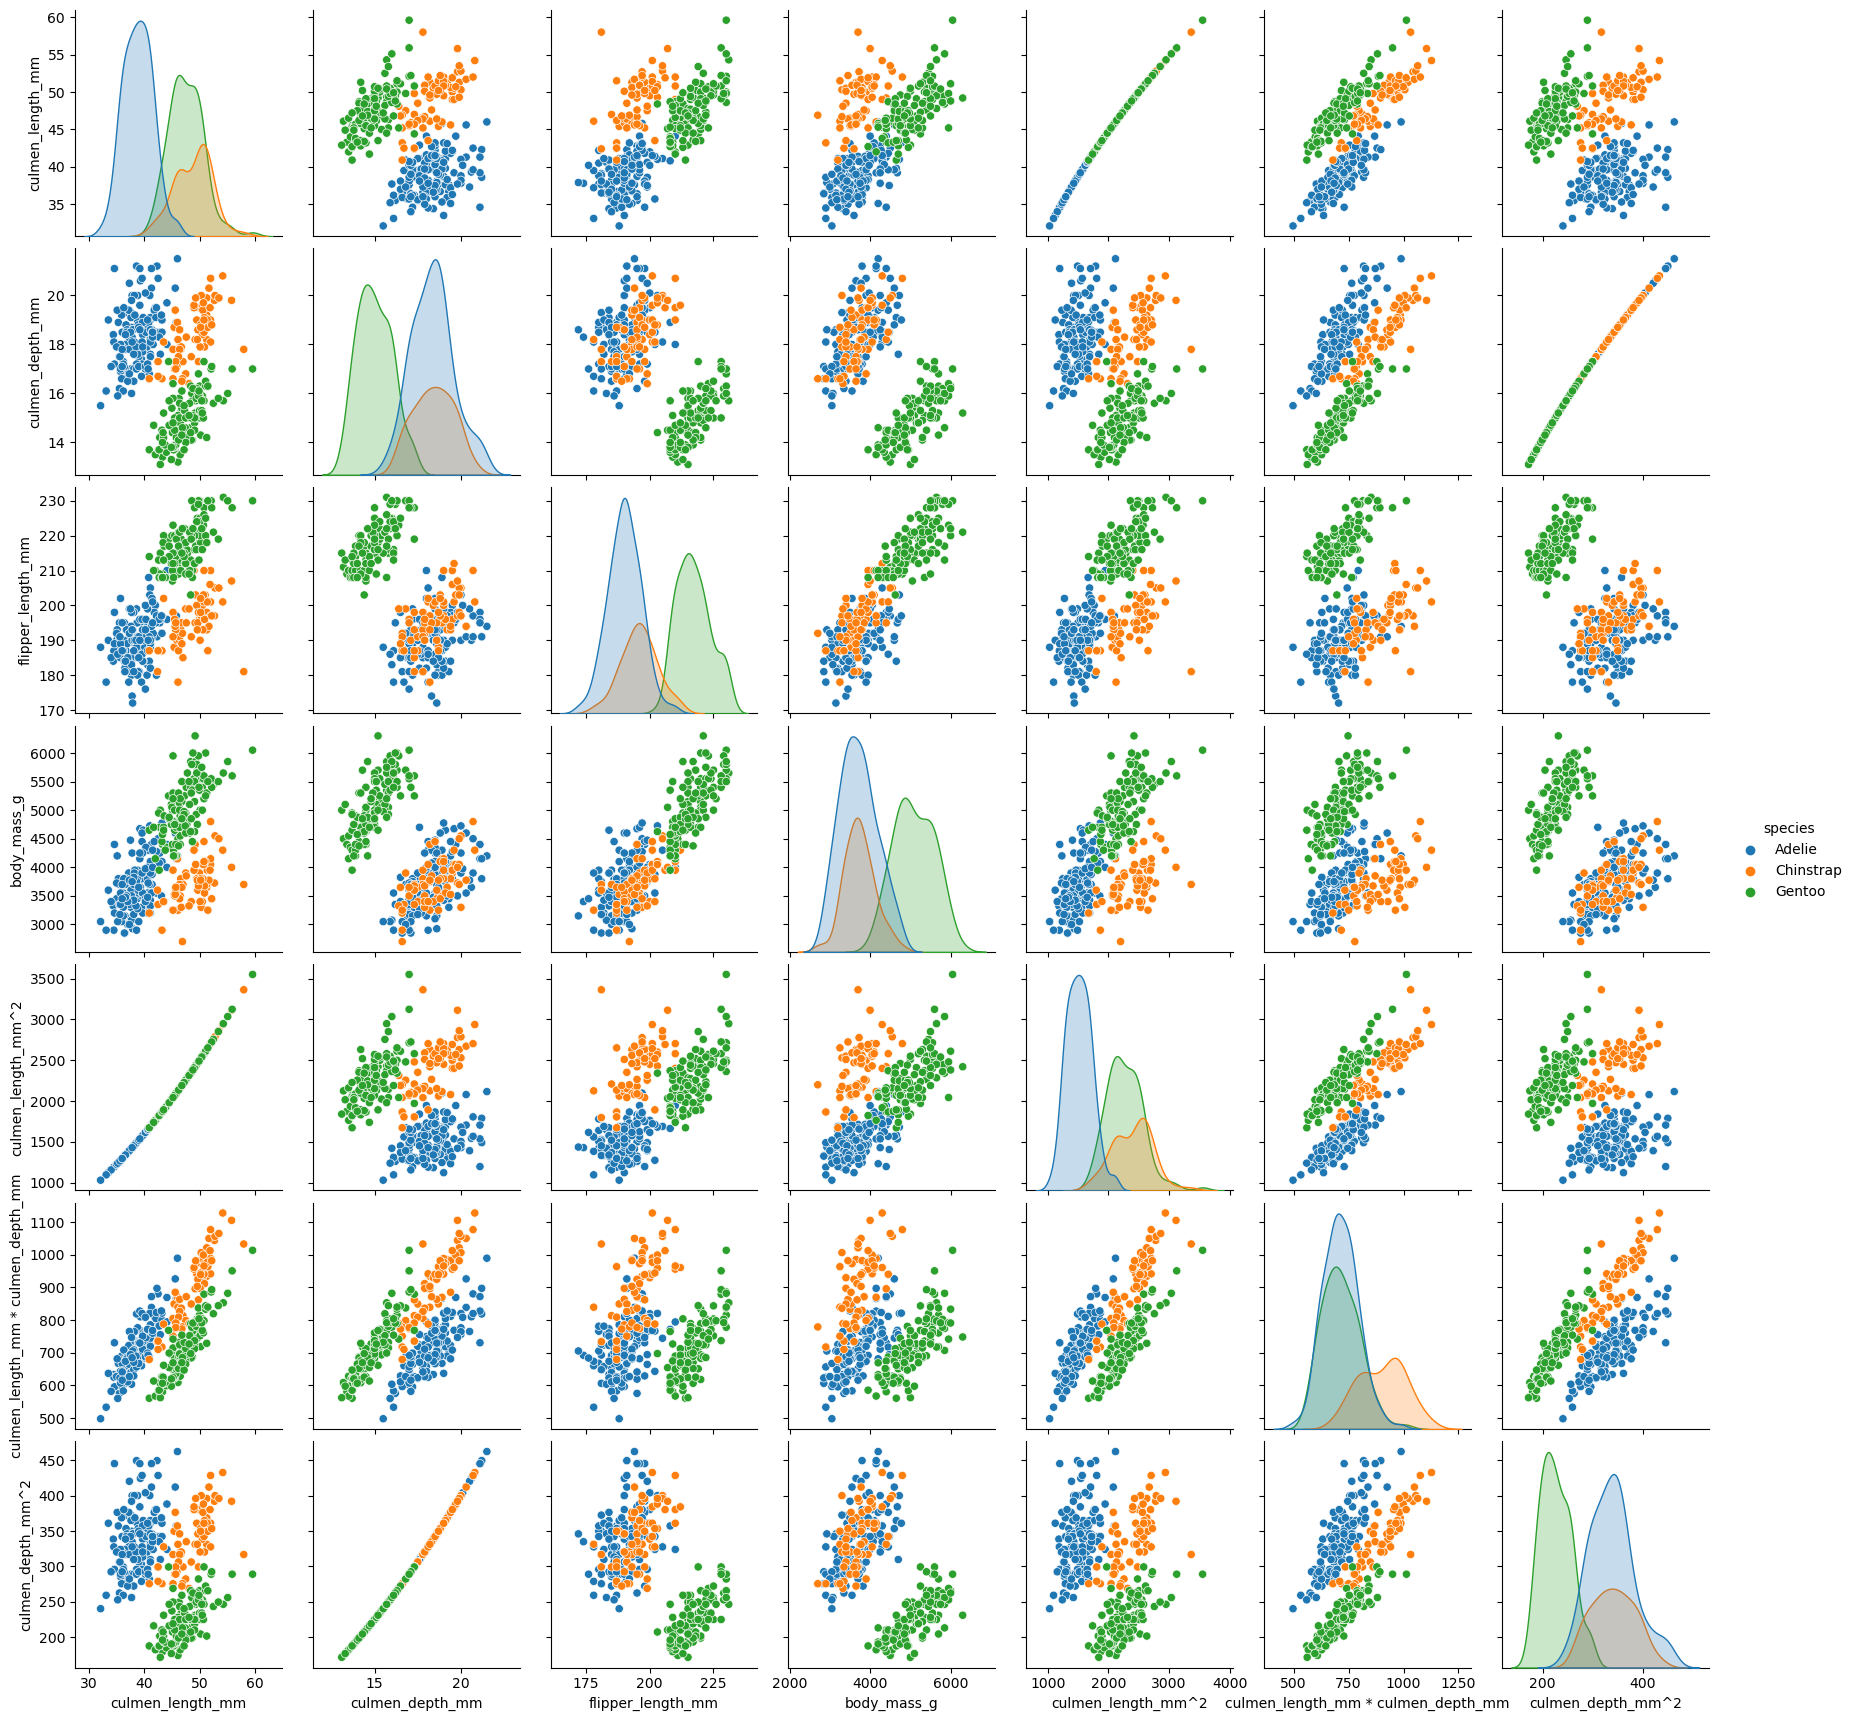

In [7]:
# データロード
df = pd.read_csv('penguins_size.csv')
df.dropna(inplace=True)
# 多項式特徴量作成
poly = PolynomialFeatures(degree=2, include_bias=False)
df[['culmen_length_mm', 'culmen_depth_mm','culmen_length_mm^2', 'culmen_length_mm * culmen_depth_mm', 'culmen_depth_mm^2' ]] = poly.fit_transform(df[['culmen_length_mm', 'culmen_depth_mm']])
sns.pairplot(df, hue='species')

### binning

In [8]:
df['body_mass_g_bin'] = pd.cut(df['body_mass_g'], bins=10, labels=False)
# カテゴリカル変数として扱う場合dtypeをobjectに変換．数値変数として扱ってもよい
df['body_mass_g_bin'] = df['body_mass_g_bin'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   species                             334 non-null    object 
 1   island                              334 non-null    object 
 2   culmen_length_mm                    334 non-null    float64
 3   culmen_depth_mm                     334 non-null    float64
 4   flipper_length_mm                   334 non-null    float64
 5   body_mass_g                         334 non-null    float64
 6   sex                                 334 non-null    object 
 7   culmen_length_mm^2                  334 non-null    float64
 8   culmen_length_mm * culmen_depth_mm  334 non-null    float64
 9   culmen_depth_mm^2                   334 non-null    float64
 10  body_mass_g_bin                     334 non-null    object 
dtypes: float64(7), object(4)
memory usage: 31.3+ 

### 四則演算

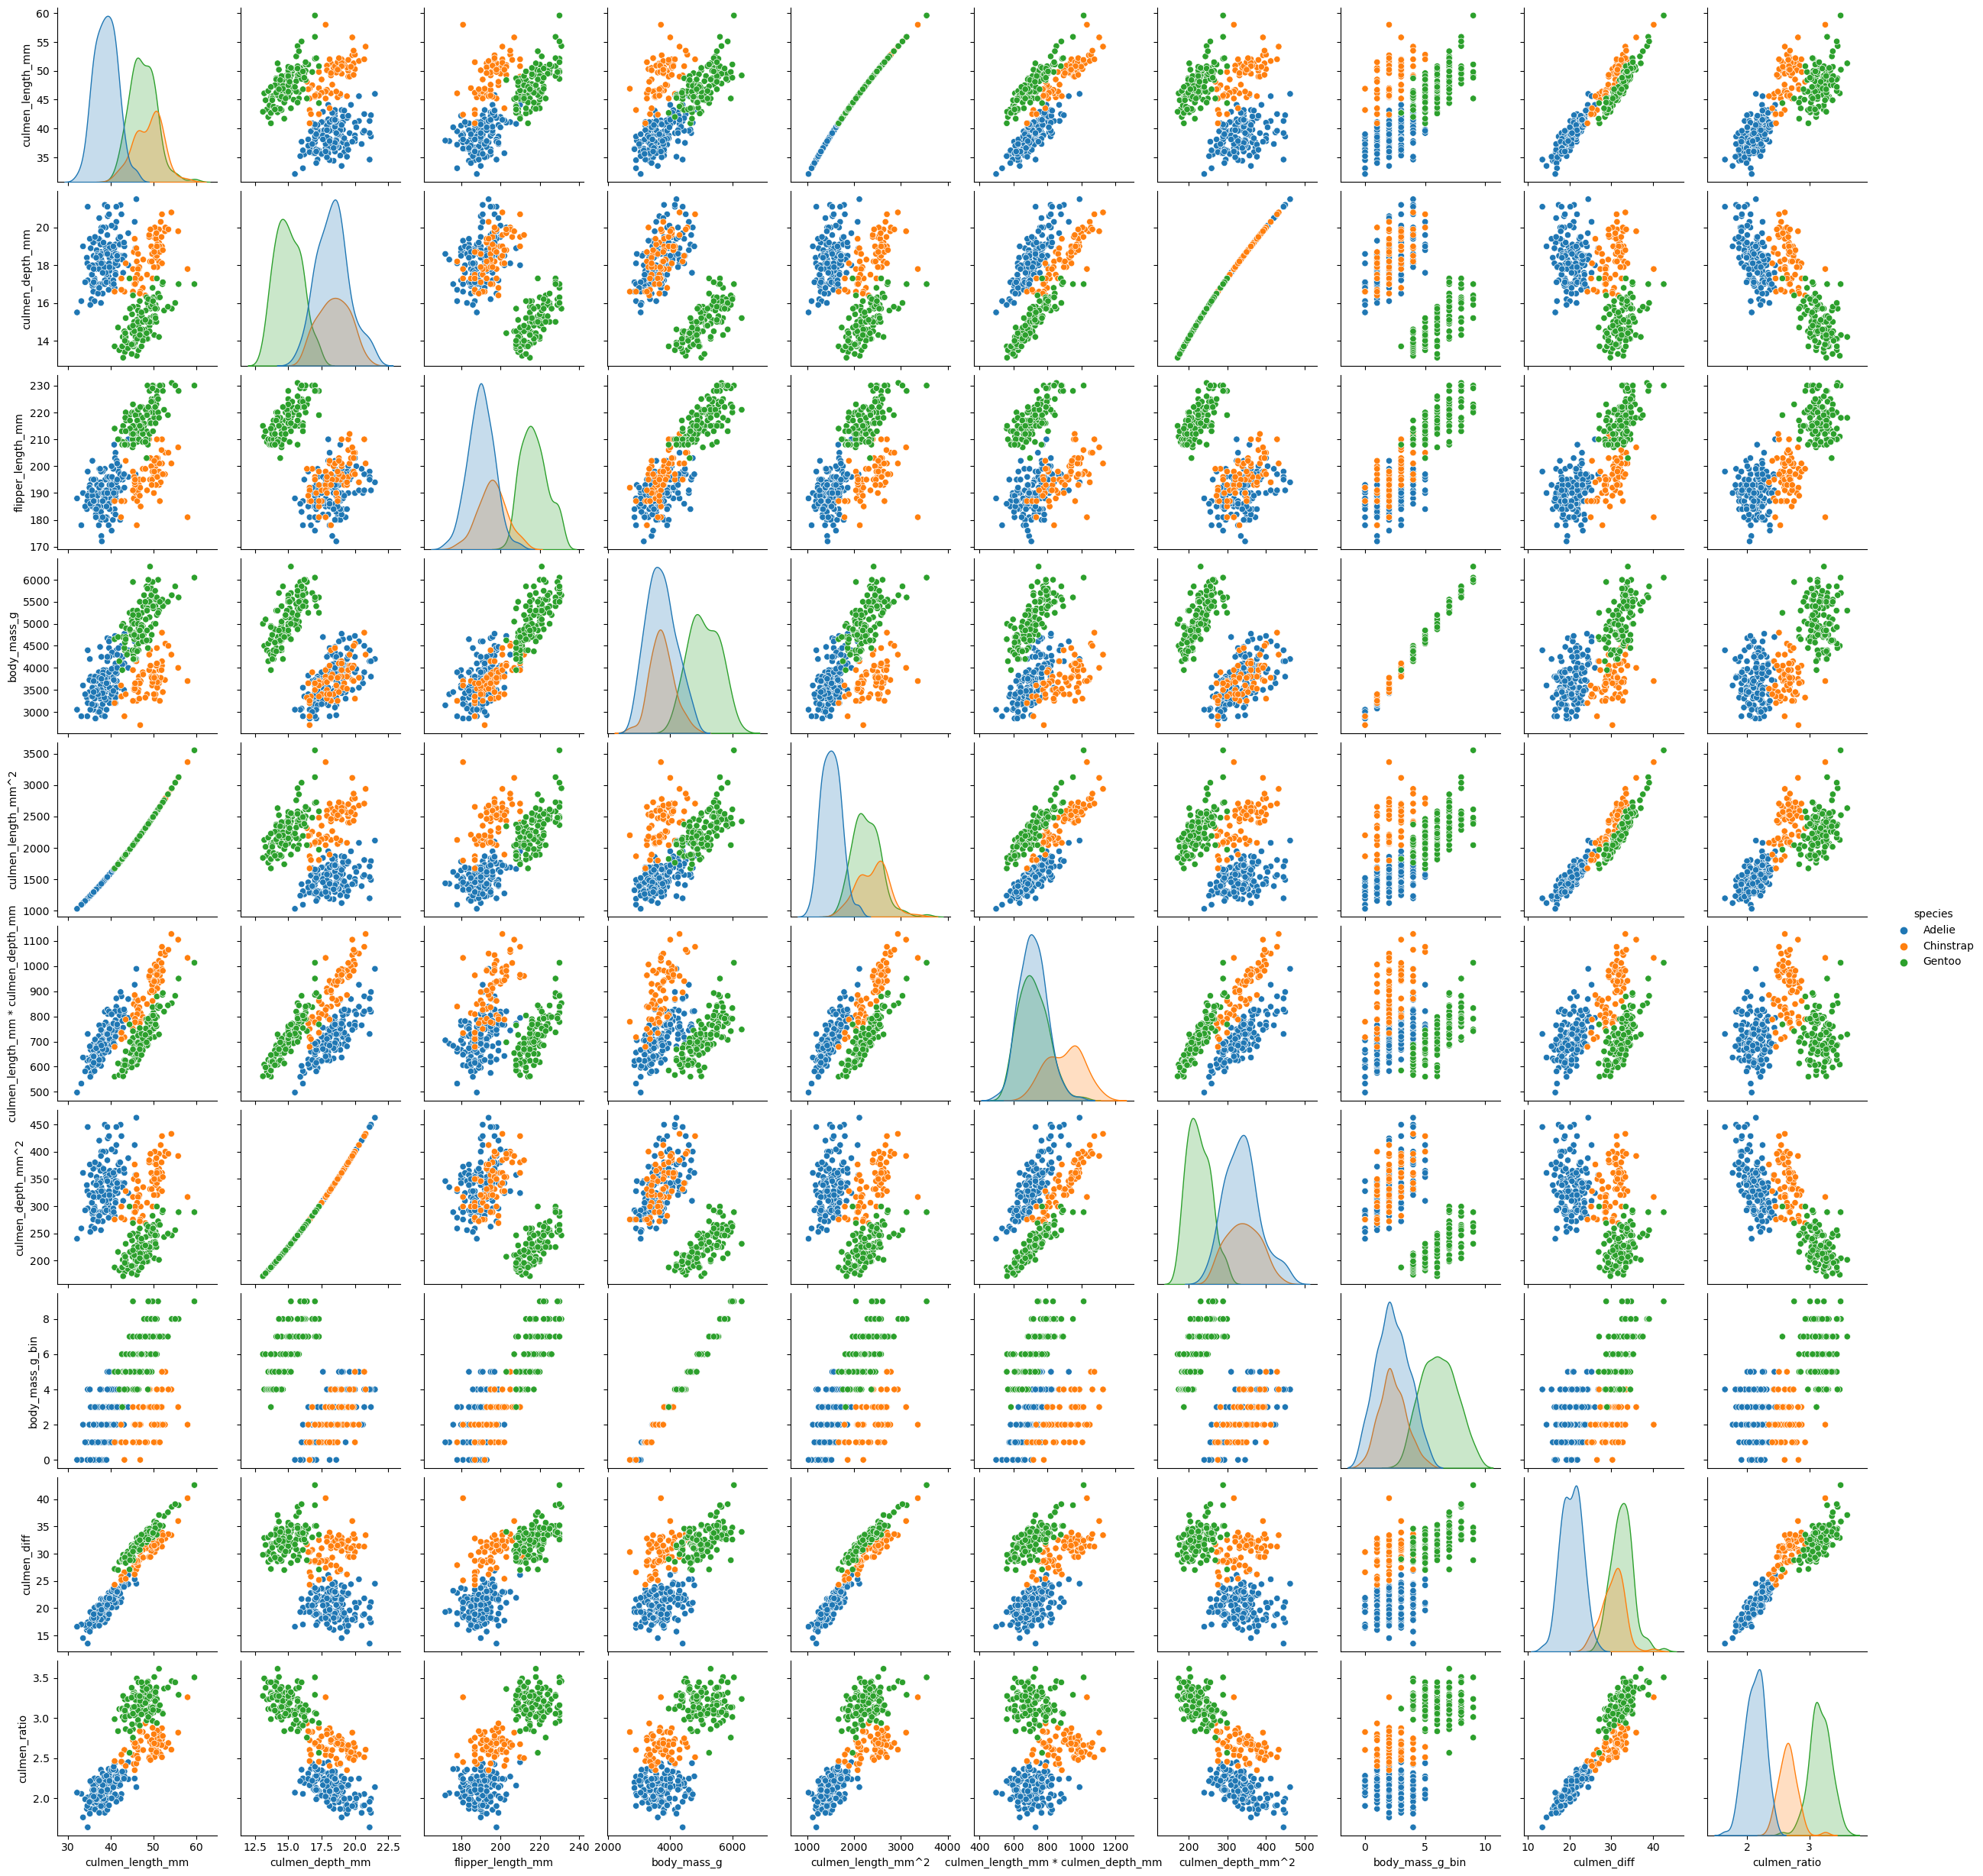

In [9]:
df['culmen_diff'] = df['culmen_length_mm'] - df['culmen_depth_mm']
df['culmen_ratio'] = df['culmen_length_mm'] / df['culmen_depth_mm']
%matplotlib inline
sns.pairplot(df, hue='species')  # 対角成分で上手く分割できているか確認

### 集約値

In [10]:
# データロード
df_app = pd.read_csv('homecredit_application.csv')
df_prev_app = pd.read_csv('homecredit_previous_application.csv')

In [11]:
# 今回のcredit申請データ
df_app.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  

[3 rows x 122 columns]

In [12]:
# 以前のcredit申請データ
df_prev_app.head(3)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     1891648      100373     Consumer loans    10872.990         115695.0   
1     2670402      100077         Cash loans          NaN              0.0   
2     1514511      101011     Consumer loans     6856.065          65866.5   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0    115119.0           11569.5         115695.0                   SATURDAY   
1         0.0               NaN              NaN                  WEDNESDAY   
2     66735.0            6588.0          65866.5                     FRIDAY   

   HOUR_APPR_PROCESS_START  ...  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       22  ...              Industry         12.0   
1                       14  ...                   XNA          NaN   
2                       21  ...  Consumer electronics         12.0   

   NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0        low_normal  POS household with interest            365243.0   
1               XNA                         Cash                 NaN   
2            middle  POS household with interest            365243.0   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0        -1013.0                    -683.0         -713.0           -709.0   
1            NaN                       NaN            NaN              NaN   
2         -596.0                    -266.0         -296.0           -289.0   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       NaN  
2                       0.0  

[3 rows x 37 columns]

In [13]:
df_prev_app.sort_values('SK_ID_CURR').head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
2547     1038818      100002     Consumer loans     9251.775         179055.0   
3507     2396755      100003     Consumer loans     6737.310          68809.5   
1654     1810518      100003         Cash loans    98356.995         900000.0   
2934     2636178      100003     Consumer loans    64567.665         337500.0   
2669     1564014      100004     Consumer loans     5357.250          24282.0   

      AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
2547    179055.0               0.0         179055.0   
3507     68053.5            6885.0          68809.5   
1654   1035882.0               NaN         900000.0   
2934    348637.5               0.0         337500.0   
2669     20106.0            4860.0          24282.0   

     WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
2547                   SATURDAY                        9  ...   
3507                   SATURDAY                       15  ...   
1654                     FRIDAY                       12  ...   
2934                     SUNDAY                       17  ...   
2669                     FRIDAY                        5  ...   

      NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
2547       Auto technology         24.0        low_normal   
3507  Consumer electronics         12.0            middle   
1654                   XNA         12.0        low_normal   
2934             Furniture          6.0            middle   
2669          Connectivity          4.0            middle   

              PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
2547      POS other with interest            365243.0         -565.0   
3507  POS household with interest            365243.0        -2310.0   
1654             Cash X-Sell: low            365243.0         -716.0   
2934   POS industry with interest            365243.0         -797.0   
2669  POS mobile without interest            365243.0         -784.0   

     DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
2547                     125.0          -25.0            -17.0   
3507                   -1980.0        -1980.0          -1976.0   
1654                    -386.0         -536.0           -527.0   
2934                    -647.0         -647.0           -639.0   
2669                    -694.0         -724.0           -714.0   

     NFLAG_INSURED_ON_APPROVAL  
2547                       0.0  
3507                       1.0  
1654                       1.0  
2934                       0.0  
2669                       0.0  

[5 rows x 37 columns]

In [14]:
# 集約値計算
credit_prev_sum = df_prev_app.groupby('SK_ID_CURR').sum()[['AMT_CREDIT']]

In [15]:
# SK_ID_CURRをキーに表を結合
df_app.join(credit_prev_sum, on='SK_ID_CURR', rsuffix='_PREV_SUM')

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0        100002       1         Cash loans           M            N   
1        100003       0         Cash loans           F            N   
2        100004       0    Revolving loans           M            Y   
3        100006       0         Cash loans           F            N   
4        100007       0         Cash loans           M            N   
..          ...     ...                ...         ...          ...   
995      101152       0         Cash loans           F            N   
996      101153       0         Cash loans           F            N   
997      101154       0         Cash loans           F            Y   
998      101155       0         Cash loans           M            N   
999      101156       0         Cash loans           M            Y   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 Y             0          202500.0    406597.5      24700.5   
1                 N             0          270000.0   1293502.5      35698.5   
2                 Y             0           67500.0    135000.0       6750.0   
3                 Y             0          135000.0    312682.5      29686.5   
4                 Y             0          121500.0    513000.0      21865.5   
..              ...           ...               ...         ...          ...   
995               N             0          112500.0    495985.5      17946.0   
996               Y             0          225000.0   1113840.0      57001.5   
997               Y             0          144000.0    517536.0      28206.0   
998               Y             0          315000.0   1288350.0      37800.0   
999               Y             2          180000.0    679500.0      27076.5   

     ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0    ...                 0                0                0   
1    ...                 0                0                0   
2    ...                 0                0                0   
3    ...                 0                0                0   
4    ...                 0                0                0   
..   ...               ...              ...              ...   
995  ...                 0                0                0   
996  ...                 0                0                0   
997  ...                 0                0                0   
998  ...                 0                0                0   
999  ...                 0                0                0   

    AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          NaN                       NaN   
4                          0.0                       0.0   
..                         ...                       ...   
995                        0.0                       0.0   
996                        0.0                       0.0   
997                        0.0                       0.0   
998                        0.0                       0.0   
999                        0.0                       0.0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          NaN                        NaN   
4                          0.0                        0.0   
..                         ...                        ...   
995                        0.0                        0.0   
996                        0.0                        0.0   
997                        0.0                        0.0   
998                        0.0                        1.0   
999                        0.0